In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import datetime as dt

import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB

session = Session(engine)

conn = engine.connect()

# PRECIPITATION ANALYSIS

In [11]:
#1. Getting the most recent date
Max_dt = pd.read_sql("select max(date) from measurement", conn)

#print(Max_dt)

#Date 1 year before
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#print(query_date)

#2. Selecting observations 12 months prior to most recent date
Measure_df = pd.read_sql("select date, prcp from measurement where date <= '2017-08-23' and date >= '2016-08-23' order by date", conn)


#3. Setting the index to date
Measure_df.set_index('date',inplace=True)


Measure_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


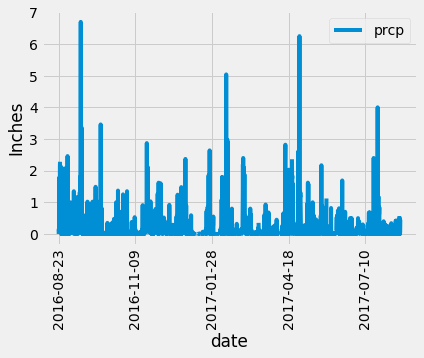

In [12]:
#4. plotting the results

Measure_df.plot()

plt.xticks(rotation='vertical')

plt.ylabel('Inches')

plt.show()

In [13]:
#Get summary statistics

summary = Measure_df['prcp'].describe()

print(summary)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# STATION ANALYSIS

In [14]:
#1. Total Number of Stations

Station_count_df = pd.read_sql("select count(distinct station) as Total_Stations from station", conn)

Station_count_df

,Total_Stations
0,9


In [15]:
#2. Most active stations

Measurement_df = pd.read_sql("select * from measurement", conn)

Station_df = pd.read_sql("select * from station", conn)

Merge_df = pd.merge(Measurement_df, Station_df, on = 'station', how = 'left')

# List the stations and observation counts in descending order.

Count_df = Merge_df[['station','name']].groupby('station').agg('count').sort_values(['name'], ascending=False)

Count_df.rename(columns = {'name': 'Total Count'}, inplace = True)

Count_df

,Total Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [16]:
# station with highest number of observations

Count_df.head(1)

,Total Count
station,
USC00519281,2772


In [17]:
#3 Design a query to retrieve the last 12 months of temperature observation data (TOBS)

#Filter by the station with the highest number of observations

Temp_df = pd.read_sql("select station, date, tobs from measurement where (date <= '2017-08-23' and date >= '2016-08-23') and station = 'USC00519281'", conn)
                         
Temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


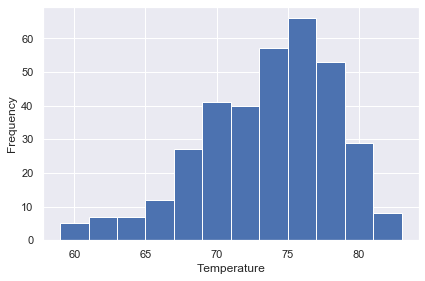

In [18]:
# Generate histogram

sns.set()

_ = plt.hist(Temp_df['tobs'], bins = 12)

_ = plt.ylabel('Frequency')

_ = plt.xlabel('Temperature')

# CLIMATE APP

## The code related to creating App engine is present in the file App.py